In [1]:
import requests
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

/Users/mac/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def from_ts(ts):
    return datetime.fromtimestamp(ts).strftime('%Y-%d-%m %H:%M%:%S')

In [3]:
#r = requests.get('https://api.coinmarketcap.com/v2/listings/')
#coin_list = [coin['symbol'] for coin in r.json()['data']]
coin_list = ['XRP','BCH','EOS','XLM','LTC','ADA','XMR','TRX','MIOTA','ETC','DASH','NEO','XEM','BNB','XTZ','VET','ZEC','OMG','ZRX','LSK','QTUM','DCR','BCN','ONT','BTG','BTS','MKR','ZIL','DOGE','DGB','ICX','AE','STEEM','BAT','WAVES','XVG','SC','NANO','MOAC','REP','PPT','BTM','NPXS','BCD','ETP','GNT','STRAT','RHOC','SNT','KCS','HSR','MITH','KMD','DGD','IOST','DCN','ARDR','WTC','MAID','AION','HT','ELF','XIN','LINK','MONA','KIN','FUN','GXS','WAN','CNX','ZEN','BNT','BTCP','NAS','HOT','MCO','MAN','XZC','EMC','AOA','CTXC','POWR','TTU','RDD','ARK','ELA','WAX','NXT','VERI','LRC','DROP','PIVX','KNC','PAY','QASH','NULS']

In [4]:
coins = coin_list[0:50]

data = {}
for coin in coins:
    url = 'https://min-api.cryptocompare.com/data/histominute?fsym='+coin+'&tsym=BTC&limit=300&aggregate=1&e=CCCAGG'
    req = requests.get(url).json()
    data[coin] = req['Data']
    
key_list = ['time', 'close', 'high', 'low', 'open', 'volumefrom', 'volumeto']

In [5]:
for coin in coins:
    if data[coin] == []:
        print(coin)
        del data[coin]

MIOTA


## The following code calculates some basic factors for each of the coins in the downloaded dataset, such as: volatility in the last 60 minutes, returns within the last 60 minutes, Sharpe ratio, and boolean True if there is a trend (rolling mean for 30 minutes is bigger than rolling mean for 60 minutes).

In [6]:
del data['DOGE']

In [7]:
coins = list(data.keys())
for coin in coins:
    for i in range(len(data[coin])-60):

        hourly_returns = float(((data[coin][i+60]['close']/data[coin][i]['close'])-1)*100)
        data[coin][i+60]['hourly_returns'] = hourly_returns

        if hourly_returns >= 0:
            data[coin][i]['move_up'] = 1
        else:
            data[coin][i]['move_up'] = 0
            
        array = [data[coin][j]['close'] for j in range(i, i+60)]
        
        volatility = float((np.std(array)/np.mean(array))*100)
        data[coin][i+60]['volatility'] = volatility
            
        try:
            sharpe_ratio = float(hourly_returns/volatility)
        except:
            print(coin)
            del data[coin]
            break
        data[coin][i+60]['sharpe'] = sharpe_ratio
            
    
        rm60 = np.mean([data[coin][j]['close'] for j in range(i, i+60)])
        rm30 = np.mean([data[coin][j]['close'] for j in range(i+30, i+60)])
        if rm30 > rm60:
            data[coin][i+60]['trend'] = 1
        else:
            data[coin][i+60]['trend'] = 0

## Make dataframe from the prepared factors

In [8]:
frames = []
keys = data[coins[0]][100].keys()
for coin in coins:
    coin_data = []
    for key in keys:
        array = [dict_[key] for dict_ in data[coin][60:-60]]
        coin_data.append(array)
    df = pd.DataFrame(coin_data)
    df = df.transpose()
    df.columns = keys
    frames.append(df)
dataFrame = pd.concat(frames)

In [9]:
dataFrame.set_index(dataFrame['time'])

,time,close,high,low,open,volumefrom,volumeto,hourly_returns,volatility,sharpe,trend,move_up
time,,,,,,,,,,,,
1.534687e+09,1.534687e+09,0.000054,0.000055,0.000054,0.000054,46147.72,2.510000,1.283005,0.353249,3.632009,1.0,0.0
1.534687e+09,1.534687e+09,0.000054,0.000055,0.000054,0.000054,63979.07,3.490000,1.133618,0.352424,3.216636,1.0,0.0
1.534687e+09,1.534687e+09,0.000054,0.000054,0.000054,0.000054,26087.04,1.420000,1.132987,0.349632,3.240508,1.0,0.0
1.534688e+09,1.534688e+09,0.000054,0.000054,0.000054,0.000054,69357.98,3.780000,0.983302,0.348797,2.819122,1.0,0.0
1.534688e+09,1.534688e+09,0.000054,0.000054,0.000054,0.000054,46930.02,2.560000,0.777490,0.348978,2.227906,1.0,0.0
1.534688e+09,1.534688e+09,0.000054,0.000055,0.000054,0.000054,68239.33,3.720000,0.497971,0.352999,1.410687,1.0,0.0
1.534688e+09,1.534688e+09,0.000054,0.000054,0.000054,0.000054,61659.61,3.360000,0.350101,0.360664,0.970713,1.0,0.0
1.534688e+09,1.534688e+09,0.000054,0.000054,0.000054,0.000054,83007.64,4.510000,0.202728,0.366142,0.553686,1.0,0.0
1.534688e+09,1.534688e+09,0.000054,0.000054,0.000054,0.000054,491488.16,26.640000,-0.294442,0.368387,-0.799275,1.0,0.0


In [10]:
pd.options.mode.use_inf_as_na = True
dataFrame.dropna(inplace=True)


## The first model below is a random forest, which allows us to see the most influential factors in the case of the price 60 minutes into the future 




In [11]:
X = dataFrame[list(keys)[1:-1]]
y = dataFrame['move_up']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
classifier=RandomForestClassifier(n_estimators=150)
classifier.fit(X_train,y_train)
y_predicted=classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted))
feature_imp = pd.Series(classifier.feature_importances_,index=list(keys)[1:-1]).sort_values(ascending=False)

Accuracy: 0.8872266973532796


No handles with labels found to put in legend.


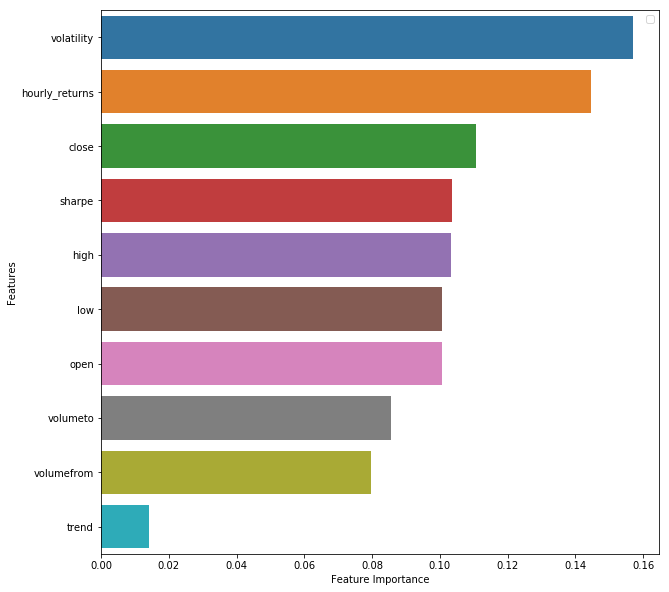

In [14]:
%matplotlib inline
plt.figure(figsize=(10,10))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.legend()
plt.show()

## The second model is a neural network

In [15]:
model = Sequential()
model.add(Dense(256, input_dim=10, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.5))
#model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.25))
#model.add(Dense(128, activation='tanh'))
#model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(output_dim=2, activation='softmax'))
y_binary = to_categorical(y_train)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'categorical_accuracy'])
model.fit(X_train.values, y_binary, epochs=200, batch_size=32)

/Users/mac/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=2)`
  if sys.path[0] == '':


Epoch 1/200
6081/6081 [==============================] - 2s 286us/step - loss: 0.6321 - acc: 0.6908 - categorical_accuracy: 0.6908
Epoch 2/200
6081/6081 [==============================] - 1s 145us/step - loss: 0.6087 - acc: 0.7045 - categorical_accuracy: 0.7045
Epoch 3/200
6081/6081 [==============================] - 1s 133us/step - loss: 0.6019 - acc: 0.7061 - categorical_accuracy: 0.7061
Epoch 4/200
6081/6081 [==============================] - 1s 126us/step - loss: 0.5974 - acc: 0.7112 - categorical_accuracy: 0.7112
Epoch 5/200
6081/6081 [==============================] - 1s 138us/step - loss: 0.5938 - acc: 0.7104 - categorical_accuracy: 0.7104
Epoch 6/200
6081/6081 [==============================] - 1s 116us/step - loss: 0.5922 - acc: 0.7153 - categorical_accuracy: 0.7153
Epoch 7/200
6081/6081 [==============================] - 1s 111us/step - loss: 0.5930 - acc: 0.7144 - categorical_accuracy: 0.7144
Epoch 8/200
6081/6081 [==============================] - 1s 110us/step - loss: 0.59

6081/6081 [==============================] - 1s 125us/step - loss: 0.5717 - acc: 0.7234 - categorical_accuracy: 0.7234
Epoch 63/200
6081/6081 [==============================] - 1s 144us/step - loss: 0.5736 - acc: 0.7252 - categorical_accuracy: 0.7252
Epoch 64/200
6081/6081 [==============================] - 1s 124us/step - loss: 0.5701 - acc: 0.7264 - categorical_accuracy: 0.7264
Epoch 65/200
6081/6081 [==============================] - 1s 122us/step - loss: 0.5707 - acc: 0.7262 - categorical_accuracy: 0.7262
Epoch 66/200
6081/6081 [==============================] - 1s 123us/step - loss: 0.5711 - acc: 0.7280 - categorical_accuracy: 0.7280
Epoch 67/200
6081/6081 [==============================] - 1s 127us/step - loss: 0.5719 - acc: 0.7269 - categorical_accuracy: 0.7269
Epoch 68/200
6081/6081 [==============================] - 1s 131us/step - loss: 0.5722 - acc: 0.7262 - categorical_accuracy: 0.7262
Epoch 69/200
6081/6081 [==============================] - 1s 134us/step - loss: 0.5709 - 

Epoch 124/200
6081/6081 [==============================] - 1s 126us/step - loss: 0.5639 - acc: 0.7292 - categorical_accuracy: 0.7292
Epoch 125/200
6081/6081 [==============================] - 1s 114us/step - loss: 0.5614 - acc: 0.7320 - categorical_accuracy: 0.7320
Epoch 126/200
6081/6081 [==============================] - 1s 105us/step - loss: 0.5667 - acc: 0.7283 - categorical_accuracy: 0.7283
Epoch 127/200
6081/6081 [==============================] - 1s 115us/step - loss: 0.5631 - acc: 0.7300 - categorical_accuracy: 0.7300
Epoch 128/200
6081/6081 [==============================] - 1s 137us/step - loss: 0.5608 - acc: 0.7306 - categorical_accuracy: 0.7306
Epoch 129/200
6081/6081 [==============================] - 1s 106us/step - loss: 0.5612 - acc: 0.7315 - categorical_accuracy: 0.7315
Epoch 130/200
6081/6081 [==============================] - 1s 106us/step - loss: 0.5629 - acc: 0.7311 - categorical_accuracy: 0.7311
Epoch 131/200
6081/6081 [==============================] - 1s 105us/s

6081/6081 [==============================] - 1s 104us/step - loss: 0.5607 - acc: 0.7334 - categorical_accuracy: 0.7334
Epoch 186/200
6081/6081 [==============================] - 1s 105us/step - loss: 0.5615 - acc: 0.7298 - categorical_accuracy: 0.7298
Epoch 187/200
6081/6081 [==============================] - 1s 107us/step - loss: 0.5582 - acc: 0.7329 - categorical_accuracy: 0.7329
Epoch 188/200
6081/6081 [==============================] - 1s 128us/step - loss: 0.5594 - acc: 0.7334 - categorical_accuracy: 0.7334
Epoch 189/200
6081/6081 [==============================] - 1s 109us/step - loss: 0.5592 - acc: 0.7321 - categorical_accuracy: 0.7321
Epoch 190/200
6081/6081 [==============================] - 1s 106us/step - loss: 0.5605 - acc: 0.7310 - categorical_accuracy: 0.7310
Epoch 191/200
6081/6081 [==============================] - 1s 104us/step - loss: 0.5567 - acc: 0.7336 - categorical_accuracy: 0.7336
Epoch 192/200
6081/6081 [==============================] - 1s 104us/step - loss: 0.

In [16]:
y_prediction = model.predict_classes(X_test.values)
print ("Accuracy" , np.sum(y_prediction == y_test) / float(len(y_test)))

Accuracy 0.7253548139624089


## The code below allows to select a coin (recommended from the top 50, because we trained on a dataset of the top 50 coins) and receive a prediction for a specific timepoint

In [18]:
chosen_coin = 'ETH'

url = 'https://min-api.cryptocompare.com/data/histominute?fsym='+chosen_coin+'&tsym=BTC&limit=300&aggregate=1&e=CCCAGG'
req = requests.get(url).json()
eth_data = req['Data']

def calc_factors(data):
    for i in range(len(data)-60):
        hourly_returns = ((data[i+60]['close']/data[i]['close'])-1)*100
        data[i+60]['hourly_returns'] = hourly_returns
        if hourly_returns >= 0:
            data[i]['move_up'] = 1
        else:
            data[i]['move_up'] = 0

        array = [data[j]['close'] for j in range(i, i+60)]
        volatility = (np.std(array)/np.mean(array))*100
        data[i+60]['volatility'] = volatility
        sharpe_ratio = hourly_returns/volatility
        data[i+60]['sharpe'] = sharpe_ratio
        rm60 = np.mean([data[j]['close'] for j in range(i, i+60)])
        rm30 = np.mean([data[j]['close'] for j in range(i+30, i+60)])
        if rm30 > rm60:
            data[i+60]['trend'] = 1
        else:
            data[i+60]['trend'] = 0
    return data[60:-60], data[-60:]

older_data, new_data = calc_factors(eth_data)

test_frame = []

x = []
keys = data['XRP'][-61].keys()
for key in list(keys):
    if key == 'time':
        array = [from_ts(dict_[key]) for dict_ in new_data]
    else:
        array = [dict_[key] for dict_ in new_data if key != 'move_up']
    x.append(array)
d = pd.DataFrame(x)
d = d.transpose()
d.columns = list(keys)
#print(d)
test_dataFrame = pd.DataFrame(d)

X_test = test_dataFrame[list(keys)[1:-1]]
#eth_test = test_dataFrame['move_up']
eth_pred=classifier.predict(X_test)
#print("Accuracy:",metrics.accuracy_score(list(eth_test), list(eth_pred)))
print(test_dataFrame['time'][0], test_dataFrame['close'][0])
print(eth_pred[0])
print('\n1 means the price will go up or stay the same in exactly 60 minutes, 0 means the price will go down.')

2018-19-08 20:11:00 0.04643
0.0

1 means the price will go up or stay the same in exactly 60 minutes, 0 means the price will go down.
